In [1]:
import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
from newsapi import NewsApiClient
%matplotlib inline

In [2]:
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package reuters to
[nltk_data]     /Users/marshallwolfe/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/marshallwolfe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marshallwolfe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable

env_path = Path('/Users/marshallwolfe/Desktop') / '.env'
load_dotenv(env_path)
api_key=os.getenv('NEWS_API_KEY')

In [5]:
# Create a newsapi client

# api_key = os.getenv("news_api")
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles

bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [7]:
# Fetch the Ethereum news articles

ethereum_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

In [8]:
# Create a backup DataFrame

bitcoin_news = bitcoin_news_en

In [9]:
# Show the total number of news
bitcoin_news_en["totalResults"]

4292

In [10]:
# Create a backup DataFrame

ethereum_news = ethereum_news_en

In [11]:
# Show the total number of news
ethereum_news_en["totalResults"]

975

In [34]:
# Define a function that creates a news dataframe

def create_df(news):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                # "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [35]:
# Create the Bitcoin news DataFrame
bitcoin_news_df = create_df(bitcoin_news["articles"])
bitcoin_news_df.head()

,title,description,text,date
0,Everything we know about the Twitter Bitcoin hack,Author’s note: This story was first published ...,Most of these accounts tweeted some variant of...,2020-07-16T20:24:47Z
1,The FBI is investigating the Twitter Bitcoin hack,The FBI has confirmed that it’s investigating ...,Reuters had previously reported the FBI would ...,2020-07-16T21:08:19Z
2,Twitter hack: FBI investigates major attack,Hackers managed to hijack official accounts of...,Image copyrightAFP/REUTERSImage caption\r\n Ki...,2020-07-16T22:42:57Z
3,Many popular Twitter accounts simultaneously h...,A number of high-profile cryptocurrency Twitte...,A number of high-profile Twitter accounts were...,2020-07-15T20:34:54Z
4,Learn how to invest in cryptocurrencies with t...,TL;DR: The Complete Cryptocurrency Investment ...,TL;DR: The Complete Cryptocurrency Investment ...,2020-06-25T04:30:00Z


In [37]:
# Create the Ethereum news DataFrame
ethereum_news_df = create_df(ethereum_news["articles"])
ethereum_news_df

,title,description,text,date
0,Singapore-based options trading platform Sparr...,"Sparrow Exchange, a Bitcoin and Ethereum optio...","Sparrow Exchange, a Bitcoin and Ethereum optio...",2020-06-23T08:48:47Z
1,Crypto Startup School: How to build projects a...,Week five of a16z’s Crypto Startup School gets...,Editor’s note:Andreessen HorowitzsCrypto Start...,2020-06-17T19:00:35Z
2,Learn how to invest in cryptocurrencies with t...,TL;DR: The Complete Cryptocurrency Investment ...,TL;DR: The Complete Cryptocurrency Investment ...,2020-06-25T04:30:00Z
3,Show HN: Web3Torrent – Adding Ethereum Micropa...,Peer-to-peer micropayments for torrenting. Bui...,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...",2020-06-22T16:23:08Z
4,Vendia raises $5.1M for its multi-cloud server...,"When the inventor of AWS Lambda, Tim Wagner, a...","When the inventor of AWS Lambda, Tim Wagner, a...",2020-07-01T15:00:17Z
5,"The Celsius Network, a DeFi lending platform t...",Robert Stevens / Decrypt:\nThe Celsius Network...,None,2020-06-23T09:10:00Z
6,"ConsenSys launches a pilot ""staking-as-a-servi...",Ian Allison / CoinDesk:\nConsenSys launches a ...,None,2020-06-16T18:50:01Z
7,Report: Active users on Ethereum-based dapps d...,Alexander Behrens / Decrypt:\nReport: Active u...,None,2020-07-07T00:35:01Z
8,Stablecoin Adoption,I was perusing the crypto markets today and no...,I was perusing the crypto markets today and no...,2020-06-23T19:33:36Z
9,"Thailand-based SYNQA, the parent company of Et...",Yogita Khatri / The Block:\nThailand-based SYN...,None,2020-06-22T16:45:01Z


In [38]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [58]:
# FROM TREVOR
# Sentiment scores dictionaries for Bitcoin
bitcoin_sentiments = []
for articles in bitcoin_news["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        bitcoin_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
btc = pd.DataFrame(bitcoin_sentiments)
btc

,text,Compound,Positive,Negative,Neutral
0,Most of these accounts tweeted some variant of...,0.0000,0.000,0.000,1.000
1,Reuters had previously reported the FBI would ...,0.0772,0.038,0.000,0.962
2,Image copyrightAFP/REUTERSImage caption\r\n Ki...,0.1280,0.049,0.000,0.951
3,A number of high-profile Twitter accounts were...,-0.8689,0.036,0.277,0.687
4,TL;DR: The Complete Cryptocurrency Investment ...,0.0000,0.000,0.000,1.000
5,A gigantic breach of Twitters security yesterd...,-0.7003,0.064,0.191,0.745
6,"Sparrow Exchange, a Bitcoin and Ethereum optio...",0.0000,0.000,0.000,1.000
7,San Francisco (CNN Business)Twitter(TWTR) acco...,0.3182,0.073,0.000,0.927
8,Something normal happened on Twitter earlier t...,-0.1531,0.084,0.101,0.815
9,Twitter spectacularly shit the bed on Wednesda...,-0.6908,0.000,0.160,0.840


In [43]:
# FROM TREVOR
# Sentiment scores dictionaries for Ethereum
ethereum_sentiments = []
for articles in ethereum_news["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        ethereum_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
eth = pd.DataFrame(ethereum_sentiments)
eth

,text,Compound,Positive,Negative,Neutral
0,"Sparrow Exchange, a Bitcoin and Ethereum optio...",0.0000,0.000,0.000,1.000
1,Editor’s note:Andreessen HorowitzsCrypto Start...,0.0000,0.000,0.000,1.000
2,TL;DR: The Complete Cryptocurrency Investment ...,0.0000,0.000,0.000,1.000
3,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...",0.5574,0.137,0.000,0.863
4,"When the inventor of AWS Lambda, Tim Wagner, a...",0.2263,0.053,0.000,0.947
5,I was perusing the crypto markets today and no...,0.7316,0.166,0.000,0.834
6,Interest in bitcoin and other cryptocurrencies...,0.3612,0.102,0.051,0.847
7,"Lightweight, open-source, universal paper wall...",-0.3400,0.000,0.088,0.912
8,Getty\r\nYou have to use phrases like Ethereum...,-0.4519,0.060,0.130,0.810
9,Many who are new to crypto assume that there w...,0.5719,0.163,0.058,0.780


In [59]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.144755,0.031950,0.057300,0.910800
std,0.372662,0.040413,0.083088,0.094438
min,-0.868900,0.000000,0.000000,0.687000
25%,-0.420600,0.000000,0.000000,0.852750
50%,0.000000,0.000000,0.000000,0.932500
75%,0.019300,0.066250,0.108000,1.000000
max,0.401900,0.110000,0.277000,1.000000


In [45]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Positive,Negative,Neutral
count,15.000000,15.000000,15.000000,15.000000
mean,0.320533,0.108667,0.038133,0.853200
std,0.395459,0.083595,0.047407,0.105102
min,-0.451900,0.000000,0.000000,0.660000
25%,0.000000,0.026500,0.000000,0.795000
50%,0.401900,0.136000,0.000000,0.847000
75%,0.658850,0.174000,0.066500,0.929500
max,0.731600,0.226000,0.130000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score of 0.069133 compared to Bitcoin's 0.06650.

Q: Which coin had the highest compound score?

A: Ethereum had the highest max compound score of 0.7316 compared to Bitcoin's 0.507.

Q. Which coin had the highest positive score?

A: Ethereum had the highest max positive score of 0.166 compared to Bitcoin's 0.09. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [60]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [61]:
# Instantiate the lemmatizer and append stopwords
wnl = WordNetLemmatizer()
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [63]:
# FROM TREVOR:

# Define tokenizer(text):
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    #words = list(filter(lambda w: w.lower(), words))
    words = [word.lower() for word in words]
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [64]:
# Create a list of Bitcoin words
bitcoin_tokens_list = []

for i in btc['text']:
    try:
        tokenized_text = tokenizer(i)
        bitcoin_tokens_list.append(tokenized_text)
    except:
        bitcoin_tokens_list.append('NaN')

In [65]:
bitcoin_tokens_list

[['account',
  'tweeted',
  'variant',
  'message',
  'someone',
  'send',
  'bitcoin',
  'address',
  'specified',
  'tweet',
  '30-minute',
  'window',
  'account',
  'owner',
  'would',
  'return',
  'doubl…',
  '+3388',
  'char'],
 ['reuters',
  'previously',
  'reported',
  'fbi',
  'would',
  'launch',
  'investigation',
  'hack',
  'fbi',
  'inquiry',
  'one',
  'multiple',
  'investigation',
  'incident',
  'drawn',
  'scrutiny',
  'number',
  'o…',
  '+966',
  'char'],
 ['image',
  'copyrightafp/reutersimage',
  'caption',
  'kim',
  'kardashian',
  'west',
  'kanye',
  'west',
  'elon',
  'musk',
  'bill',
  'gate',
  'barack',
  'obama',
  "'hacked'",
  'fbi',
  'launched',
  'investigation',
  'hacker',
  'hijacked',
  'twitt…',
  '+6470',
  'char'],
 ['number',
  'high-profile',
  'twitter',
  'account',
  'simultaneously',
  'hacked',
  'wednesday',
  'attacker',
  'used',
  'account',
  'million',
  'follower',
  'spread',
  'cryptocurrency',
  'scam',
  'bitcoin',
  'ri

In [66]:
# Create a new tokens column for bitcoin
btc['tokens'] = bitcoin_tokens_list
btc

,text,Compound,Positive,Negative,Neutral,tokens
0,Most of these accounts tweeted some variant of...,0.0000,0.000,0.000,1.000,"[account, tweeted, variant, message, someone, ..."
1,Reuters had previously reported the FBI would ...,0.0772,0.038,0.000,0.962,"[reuters, previously, reported, fbi, would, la..."
2,Image copyrightAFP/REUTERSImage caption\r\n Ki...,0.1280,0.049,0.000,0.951,"[image, copyrightafp/reutersimage, caption, ki..."
3,A number of high-profile Twitter accounts were...,-0.8689,0.036,0.277,0.687,"[number, high-profile, twitter, account, simul..."
4,TL;DR: The Complete Cryptocurrency Investment ...,0.0000,0.000,0.000,1.000,"[tl, dr, complete, cryptocurrency, investment,..."
5,A gigantic breach of Twitters security yesterd...,-0.7003,0.064,0.191,0.745,"[gigantic, breach, twitter, security, yesterda..."
6,"Sparrow Exchange, a Bitcoin and Ethereum optio...",0.0000,0.000,0.000,1.000,"[sparrow, exchange, bitcoin, ethereum, option,..."
7,San Francisco (CNN Business)Twitter(TWTR) acco...,0.3182,0.073,0.000,0.927,"[san, francisco, cnn, business, twitter, twtr,..."
8,Something normal happened on Twitter earlier t...,-0.1531,0.084,0.101,0.815,"[something, normal, happened, twitter, earlier..."
9,Twitter spectacularly shit the bed on Wednesda...,-0.6908,0.000,0.160,0.840,"[twitter, spectacularly, shit, bed, wednesday,..."


In [67]:
# Create a list of Ethereum words
ethereum_tokens_list = []

for i in eth['text']:
    try:
        tokenized_text = tokenizer(i)
        ethereum_tokens_list.append(tokenized_text)
    except:
        ethereum_tokens_list.append('NaN')
ethereum_tokens_list

[['sparrow',
  'exchange',
  'bitcoin',
  'ethereum',
  'option',
  'trading',
  'platform',
  'based',
  'singapore',
  'announced',
  'today',
  'raised',
  '3.5',
  'million',
  'series',
  'funding',
  'round',
  'led',
  'hdr',
  'group',
  'owner',
  'cry…',
  '+833',
  'char'],
 ['editor',
  '’',
  'note',
  'andreessen',
  'horowitzscrypto',
  'startup',
  'school',
  'brought',
  'together',
  '45',
  'participant',
  'around',
  'u.s.',
  'overseas',
  'seven-week',
  'course',
  'learn',
  'build',
  'crypto',
  'company',
  'andreessen',
  'ho…',
  '+3009',
  'char'],
 ['tl',
  'dr',
  'complete',
  'cryptocurrency',
  'investment',
  'bundle',
  'sale',
  '£19.21',
  'june',
  '25',
  'saving',
  '94',
  'list',
  'price',
  "'re",
  'believe',
  'every',
  'plot',
  'point',
  'movie',
  'social',
  'network',
  'mark',
  'z…',
  '+2756',
  'char'],
 ['introducing',
  'web3torrent',
  'june',
  '18',
  '2020',
  'today',
  'excited',
  'share',
  'something',
  'weve',
  

In [68]:
# Create a new tokens column for ethereum
eth['tokens'] = ethereum_tokens_list
eth

,text,Compound,Positive,Negative,Neutral,tokens
0,"Sparrow Exchange, a Bitcoin and Ethereum optio...",0.0000,0.000,0.000,1.000,"[sparrow, exchange, bitcoin, ethereum, option,..."
1,Editor’s note:Andreessen HorowitzsCrypto Start...,0.0000,0.000,0.000,1.000,"[editor, ’, note, andreessen, horowitzscrypto,..."
2,TL;DR: The Complete Cryptocurrency Investment ...,0.0000,0.000,0.000,1.000,"[tl, dr, complete, cryptocurrency, investment,..."
3,"Introducing Web3Torrent\r\nJune 18, 2020\r\nTo...",0.5574,0.137,0.000,0.863,"[introducing, web3torrent, june, 18, 2020, tod..."
4,"When the inventor of AWS Lambda, Tim Wagner, a...",0.2263,0.053,0.000,0.947,"[inventor, aws, lambda, tim, wagner, former, h..."
5,I was perusing the crypto markets today and no...,0.7316,0.166,0.000,0.834,"[perusing, crypto, market, today, noticed, tet..."
6,Interest in bitcoin and other cryptocurrencies...,0.3612,0.102,0.051,0.847,"[interest, bitcoin, cryptocurrencies, includin..."
7,"Lightweight, open-source, universal paper wall...",-0.3400,0.000,0.088,0.912,"[lightweight, open-source, universal, paper, w..."
8,Getty\r\nYou have to use phrases like Ethereum...,-0.4519,0.060,0.130,0.810,"[getty, use, phrase, like, ethereum, going, mo..."
9,Many who are new to crypto assume that there w...,0.5719,0.163,0.058,0.780,"[many, new, crypto, assume, one, important, cr..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [69]:
from collections import Counter
from nltk import ngrams

### N-grams for N = 2

In [110]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc['text'].str.cat()), N)
Counter(grams).most_common(20)

[(('elon', 'musk'), 6),
 (('bill', 'gate'), 4),
 (('barack', 'obama'), 4),
 (('twitter', 'account'), 3),
 (('joe', 'biden'), 3),
 (('law', 'enforcement'), 3),
 (('send', 'bitcoin'), 2),
 (('kim', 'kardashian'), 2),
 (('kanye', 'west'), 2),
 (('gate', 'barack'), 2),
 (('gate', 'elon'), 2),
 (('obama', 'joe'), 2),
 (('biden', 'elon'), 2),
 (('public', 'figure'), 2),
 (('char', 'london/new'), 2),
 (('london/new', 'york'), 2),
 (('york', 'reuters'), 2),
 (('reuters', 'hacker'), 2),
 (('hacker', 'targeted'), 2),
 (('targeted', 'twitter'), 2)]

In [115]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth['text'].str.cat()), N)
Counter(grams).most_common(20)

[(('bitcoin', 'ethereum'), 3),
 (('paper', 'wallet'), 2),
 (('sparrow', 'exchange'), 1),
 (('exchange', 'bitcoin'), 1),
 (('ethereum', 'option'), 1),
 (('option', 'trading'), 1),
 (('trading', 'platform'), 1),
 (('platform', 'based'), 1),
 (('based', 'singapore'), 1),
 (('singapore', 'announced'), 1),
 (('announced', 'today'), 1),
 (('today', 'raised'), 1),
 (('raised', '3.5'), 1),
 (('3.5', 'million'), 1),
 (('million', 'series'), 1),
 (('series', 'funding'), 1),
 (('funding', 'round'), 1),
 (('round', 'led'), 1),
 (('led', 'hdr'), 1),
 (('hdr', 'group'), 1)]

### Top 10 words for each coin

In [112]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(token_df, N=10):
    """Returns the top N tokens from the frequency count"""
    token = tokenizer(token_df['text'].str.cat())
    return Counter(token).most_common(N)

In [116]:
# Get the top 10 words for Bitcoin
token_count(btc, N=10)

[('char', 20),
 ('account', 10),
 ('bitcoin', 10),
 ('twitter', 10),
 ('elon', 6),
 ('musk', 6),
 ('reuters', 5),
 ('hack', 5),
 ('wednesday', 5),
 ('tweet', 4)]

In [117]:
# Get the top 10 words for Ethereum
token_count(eth, N=10)

[('char', 14),
 ('bitcoin', 11),
 ('crypto', 8),
 ('ethereum', 6),
 ('wallet', 5),
 ('cryptocurrency', 4),
 ('today', 3),
 ('web3torrent', 3),
 ('based', 2),
 ('’', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [121]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [138]:
def process_text(full_text, stop_words):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', full_text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in stop_words]
    return ' '.join(output)

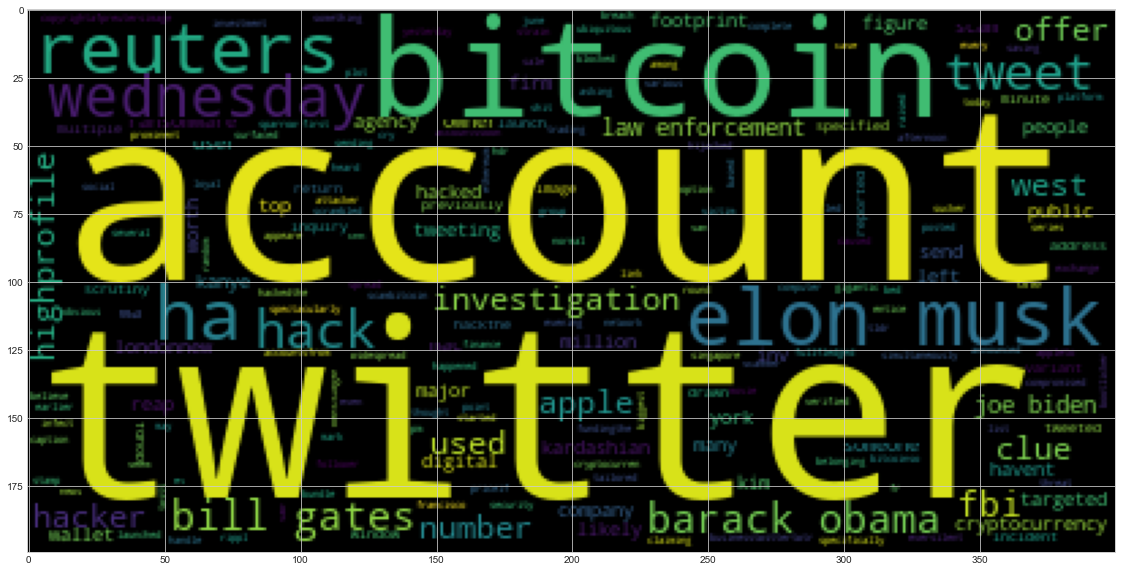

In [151]:
# Generate the Bitcoin word cloud
bitcoin_corpus = [i for i in btc['text']]
bitcoin_big_string = ' '.join(bitcoin_corpus)
bitcoin_input_words = process_text(bitcoin_big_string, stop)
wc = WordCloud().generate(bitcoin_input_words)
plt.imshow(wc)

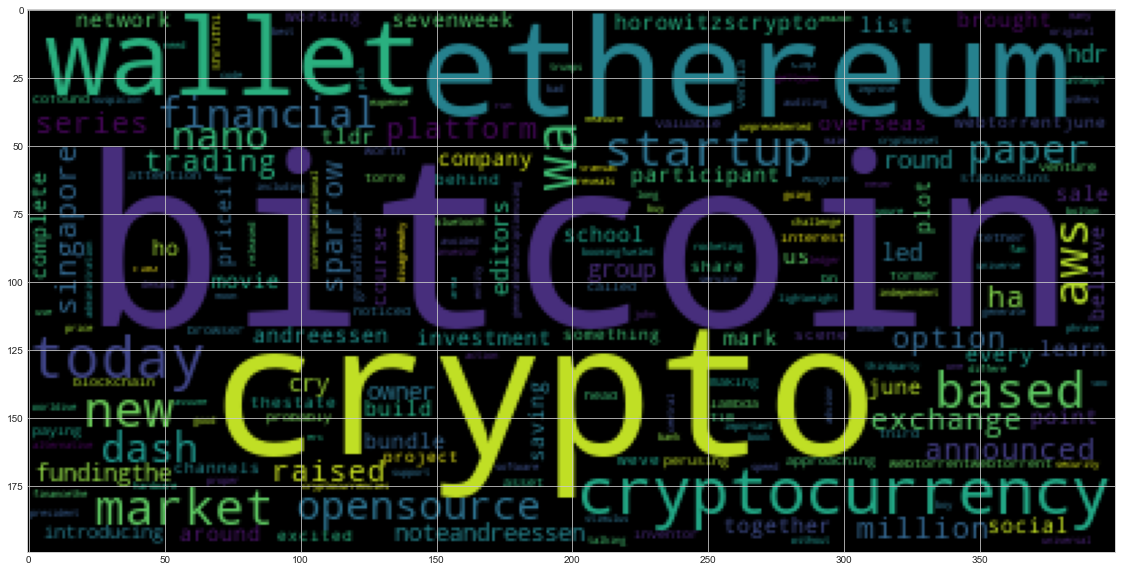

In [152]:
# Generate the Ethereum word cloud
ethereum_corpus = [i for i in eth['text']]
ethereum_big_string = ' '.join(ethereum_corpus)
ethereum_input_words = process_text(ethereum_big_string, stop)
wc = WordCloud().generate(ethereum_input_words)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [153]:
import spacy
from spacy import displacy

In [154]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [155]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [211]:
# Concatenate all of the bitcoin text together
bitcoin_big_string

"Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars] Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars] Image copyrightAFP/REUTERSImage caption\r\n Kim Kardashian West, Kanye West, Elon Musk, Bill Gates and Barack Obama were all 'hacked'\r\nThe FBI has launched an investigation after hackers hijacked Twitt… [+6470 chars] A number of high-profile Twitter accounts were simultaneously hacked on Wednesday by attackers who used the accounts some with millions of followers to spread a cryptocurrency scam.\r\n@bitcoin, @rippl… [+2161 chars] TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\r\nIf we're 

In [212]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_big_string)

# Add a title to the document
doc.user_data["title"] = "NER Visualizatoin of Bitcoin Article Words"

In [213]:
# Render the visualization
displacy.render(doc, style='ent')

In [214]:
# List all Entities
for y in [(X.text, X.label_) for X in doc.ents]:
    print(y[0]+' '+y[1])

Bitcoin GPE
30-minute TIME
Reuters ORG
FBI ORG
FBI ORG
one CARDINAL
Kanye West GPE
Elon Musk ORG
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PERSON
Twitter PERSON
Wednesday DATE
millions CARDINAL
@rippl ORG
19.21 MONEY
June 25 DATE
94% PERCENT
The Social Network ORG
Mark Z PERSON
Twitters NORP
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
Sparrow Exchange ORG
Bitcoin GPE
Singapore GPE
today DATE
$3.5 million MONEY
HDR Group ORG
San Francisco GPE
CNN ORG
Joe Biden PERSON
Bill Gates PERSON
Elon Musk ORG
Apple ORG
Wednesday DATE
Twitter ORG
earlier this afternoon TIME
Elon Musk ORG
Twitter ORG
Wednesday evening TIME
6 pm ET TIME
Twitter ORG
Apple ORG
Mac ORG
first ORDINAL
Mac ORG
Barack Obama PERSON
Joe Biden PERSON
Elon Musk PERSON
Kanye West GPE
Apple ORG
Wednesday DATE
Twitter ORG
Barack GPE
Joe Biden PERSON
Elon Musk ORG
Kim Kardashian PERSON
WASHINGTON GPE
Reuters ORG
Twitter ORG
Bill Gates PERSON
Elon Musk ORG
bitcoin GPE
Wednesday DATE
Nvidias GPE
Sept

---

## Ethereum NER

In [199]:
# Concatenate all of the bitcoin text together
ethereum_big_string

"Sparrow Exchange, a Bitcoin and Ethereum options trading platform based in Singapore, announced today it has raised $3.5 million in Series A funding.\r\nThe round was led by HDR Group, the owner of cry… [+833 chars] Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars] TL;DR: The Complete Cryptocurrency Investment bundle is on sale for £19.21 as of June 25, saving you 94% on list price.\r\nIf we're to believe every plot point from the movie The Social Network, Mark Z… [+2756 chars] Introducing Web3Torrent\r\nJune 18, 2020\r\nToday were excited to share something weve been working on behind the scenes of the\r\nState Channels project: Web3Torrent.\r\nWeb3Torrent is a browser based torre… [+10464 chars] When the inventor of AWS Lambda, Tim Wagner, and the former head of blockchain at AWS, Shruthi Rao, co-found a startup, it’s pr

In [203]:
# Run the NER processor on all of the text
doc = nlp(ethereum_big_string)

# Add a title to the document
doc.user_data["title"] = "NER Visualizatoin of Ethereum Article Words"

In [204]:
# Render the visualization
displacy.render(doc, style='ent')

In [209]:
# List all Entities
for y in [(X.text, X.label_) for X in doc.ents]:
    print(y[0]+' '+y[1])

Sparrow Exchange ORG
Bitcoin GPE
Singapore GPE
today DATE
$3.5 million MONEY
HDR Group ORG
Andreessen HorowitzsCrypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
19.21 MONEY
June 25 DATE
94% PERCENT
The Social Network ORG
Mark Z PERSON
June 18, 2020 DATE
Today DATE
AWS Lambda ORG
Tim Wagner PERSON
Shruthi Rao PERSON
Vendia ORG
today DATE
Tether PERSON
10bn MONEY
third ORDINAL
Bitcoin GPE
third ORDINAL
one CARDINAL
BITCOIN DASH THE Bitcoin ORG
2009 DATE
CRYPTO UNIVERSE Dash PERSON
Bitcoin GPE
two CARDINAL
Bolton PERSON
Trumps PERSON
Bitcoin GPE
Bitcoin GPE
Ethereum GPE
John R. B… PERSON
Bitcoin GPE
Ethereum GPE
ERC20 ORG
The Ledger Nano X Bluetooth WORK_OF_ART
89.25 MONEY
Amazon ORG
Sigal Mandelker PERSON
U.S. Treasury ORG
2018 DATE
the Department of Justice ORG
